In [240]:
import pandas as pd 
import numpy as np 

In [241]:
df = pd.read_csv('Data\heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


`id` (Unique id for each patient)\
`age` (Age of the patient in years)\
`origin` (place of study)\
`sex` (Male/Female)\
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])\
`trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))\
`chol` (serum cholesterol in mg/dl)\
`fbs` (if fasting blood sugar > 120 mg/dl)\
`restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]\
`thalach`: maximum heart rate achieved\
`exang`: exercise-induced angina (True/ False)\
`oldpeak`: ST depression induced by exercise relative to rest\
`slope`: the slope of the peak exercise ST segment\
`ca`: number of major vessels (0-3) colored by fluoroscopy\
`thal`: [normal; fixed defect; reversible defect]\
`num`: the predicted attribute

In [243]:
for column in df.select_dtypes(include=['object']).columns:
    # print (f"Column: {column}")
    print (df[column].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
fbs
False    692
True     138
Name: count, dtype: int64
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang
False    528
True     337
Name: count, dtype: int64
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [244]:
# check for missing values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Filling missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = imputer.fit_transform(df[cat_columns])


In [248]:
#  Filling missing values in float64 columns with 0
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].replace(np.nan, 0)

# Changing 'ca' column to object type(categorical)[binning]
df['ca'] = df['ca'].astype(object)

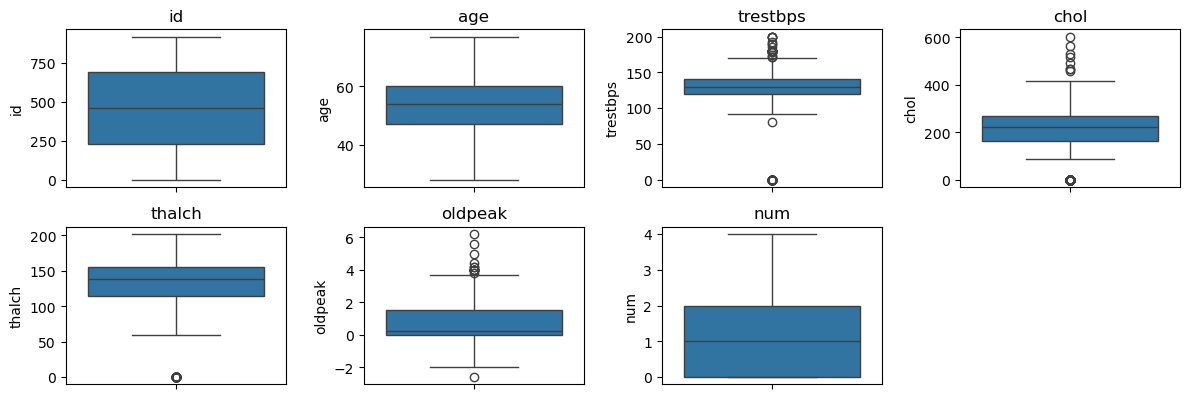

In [250]:
from matplotlib import pyplot as plt
import seaborn as sns

# Box plots for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

After viewing the numerical columns, filling the missing data with `0` creates a huge outlier problem in some columns that is; `oldpeak`, `ca`, `chol`, `trestbps`, `thalch`.\
https://towardsdatascience.com/dont-throw-away-your-outliers-c37e1ab0ce19/ 

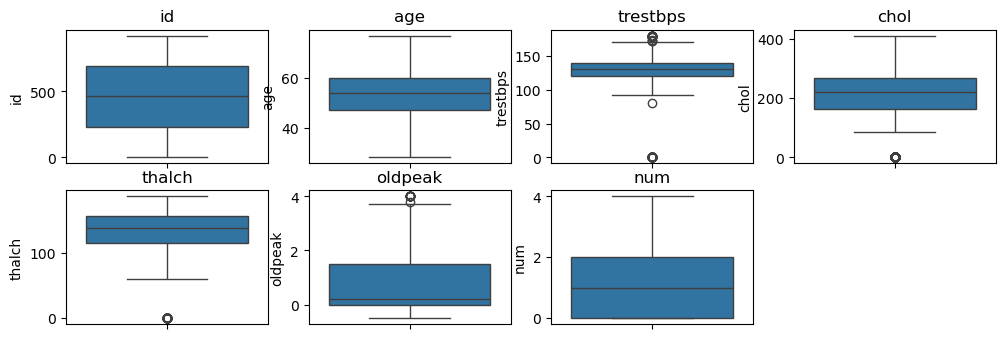

In [251]:
# Define the function for Winsorization
def winsorize(data, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        lower_bound = data[col].quantile(lower_percentile)
        upper_bound = data[col].quantile(upper_percentile)
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

# Apply Winsorization to numerical columns
winsorize_columns = ['oldpeak', 'chol', 'trestbps', 'thalch']
df = winsorize(df, winsorize_columns, lower_percentile=0.01, upper_percentile=0.99)

# Verify the effect of winsorization
plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=feature)
    plt.title(feature)


In [252]:
df['thalch'].value_counts()

thalch
0.0      55
150.0    43
140.0    41
120.0    35
130.0    30
         ..
104.0     1
91.0      1
71.0      1
87.0      1
73.0      1
Name: count, Length: 113, dtype: int64

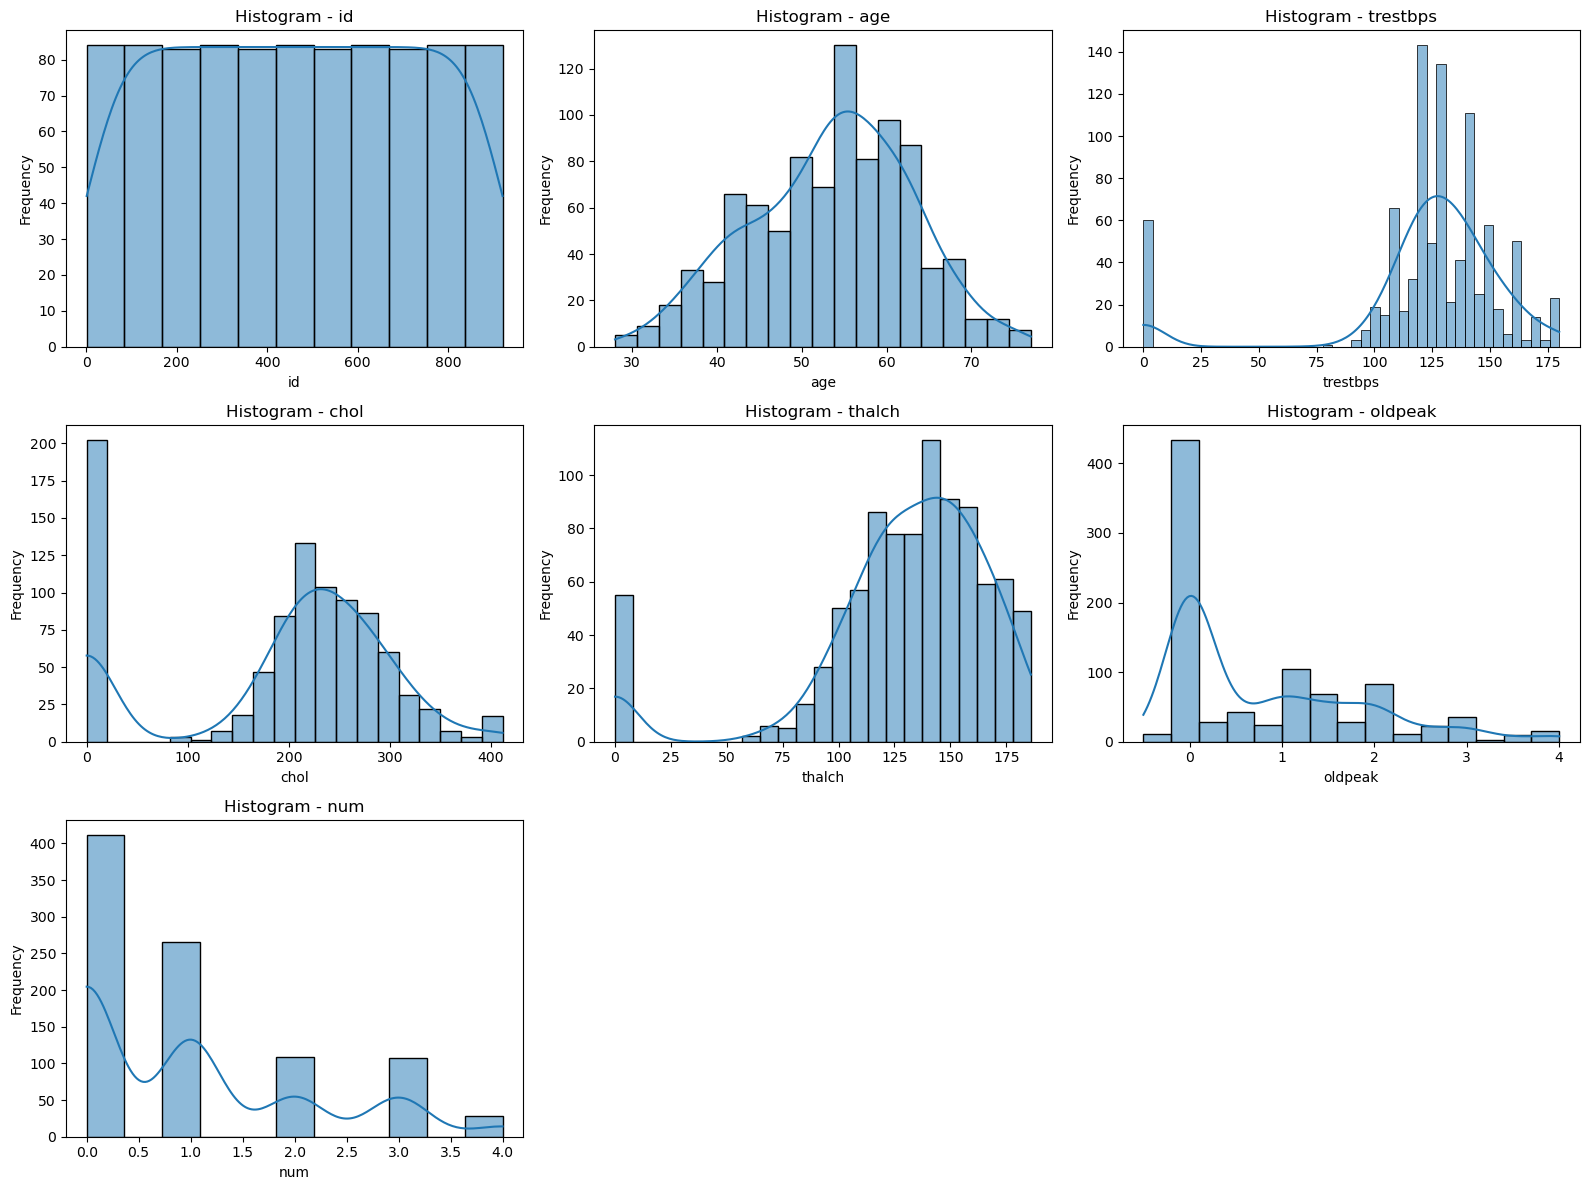

In [253]:
# Plotting histograms for numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(16, 12))
for i, var in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram - {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

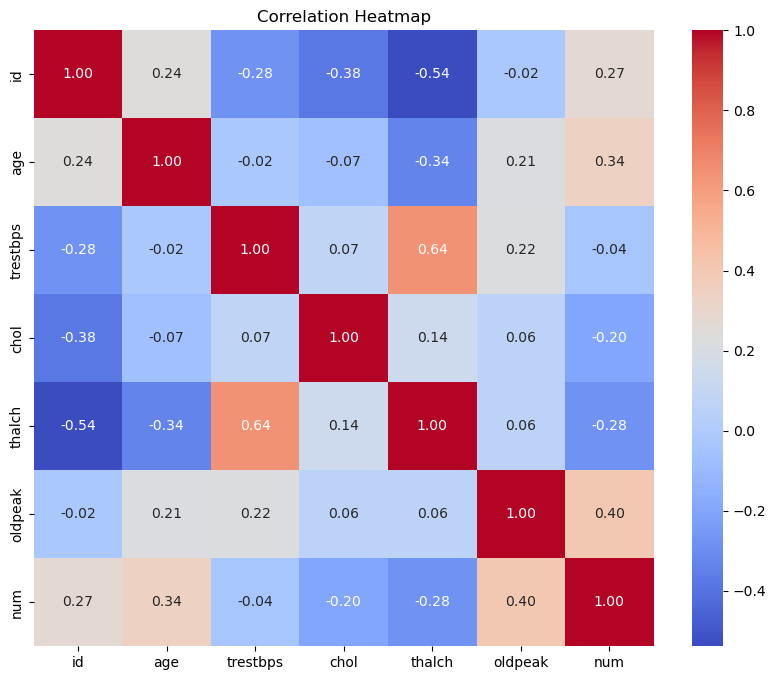

In [254]:
# Correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

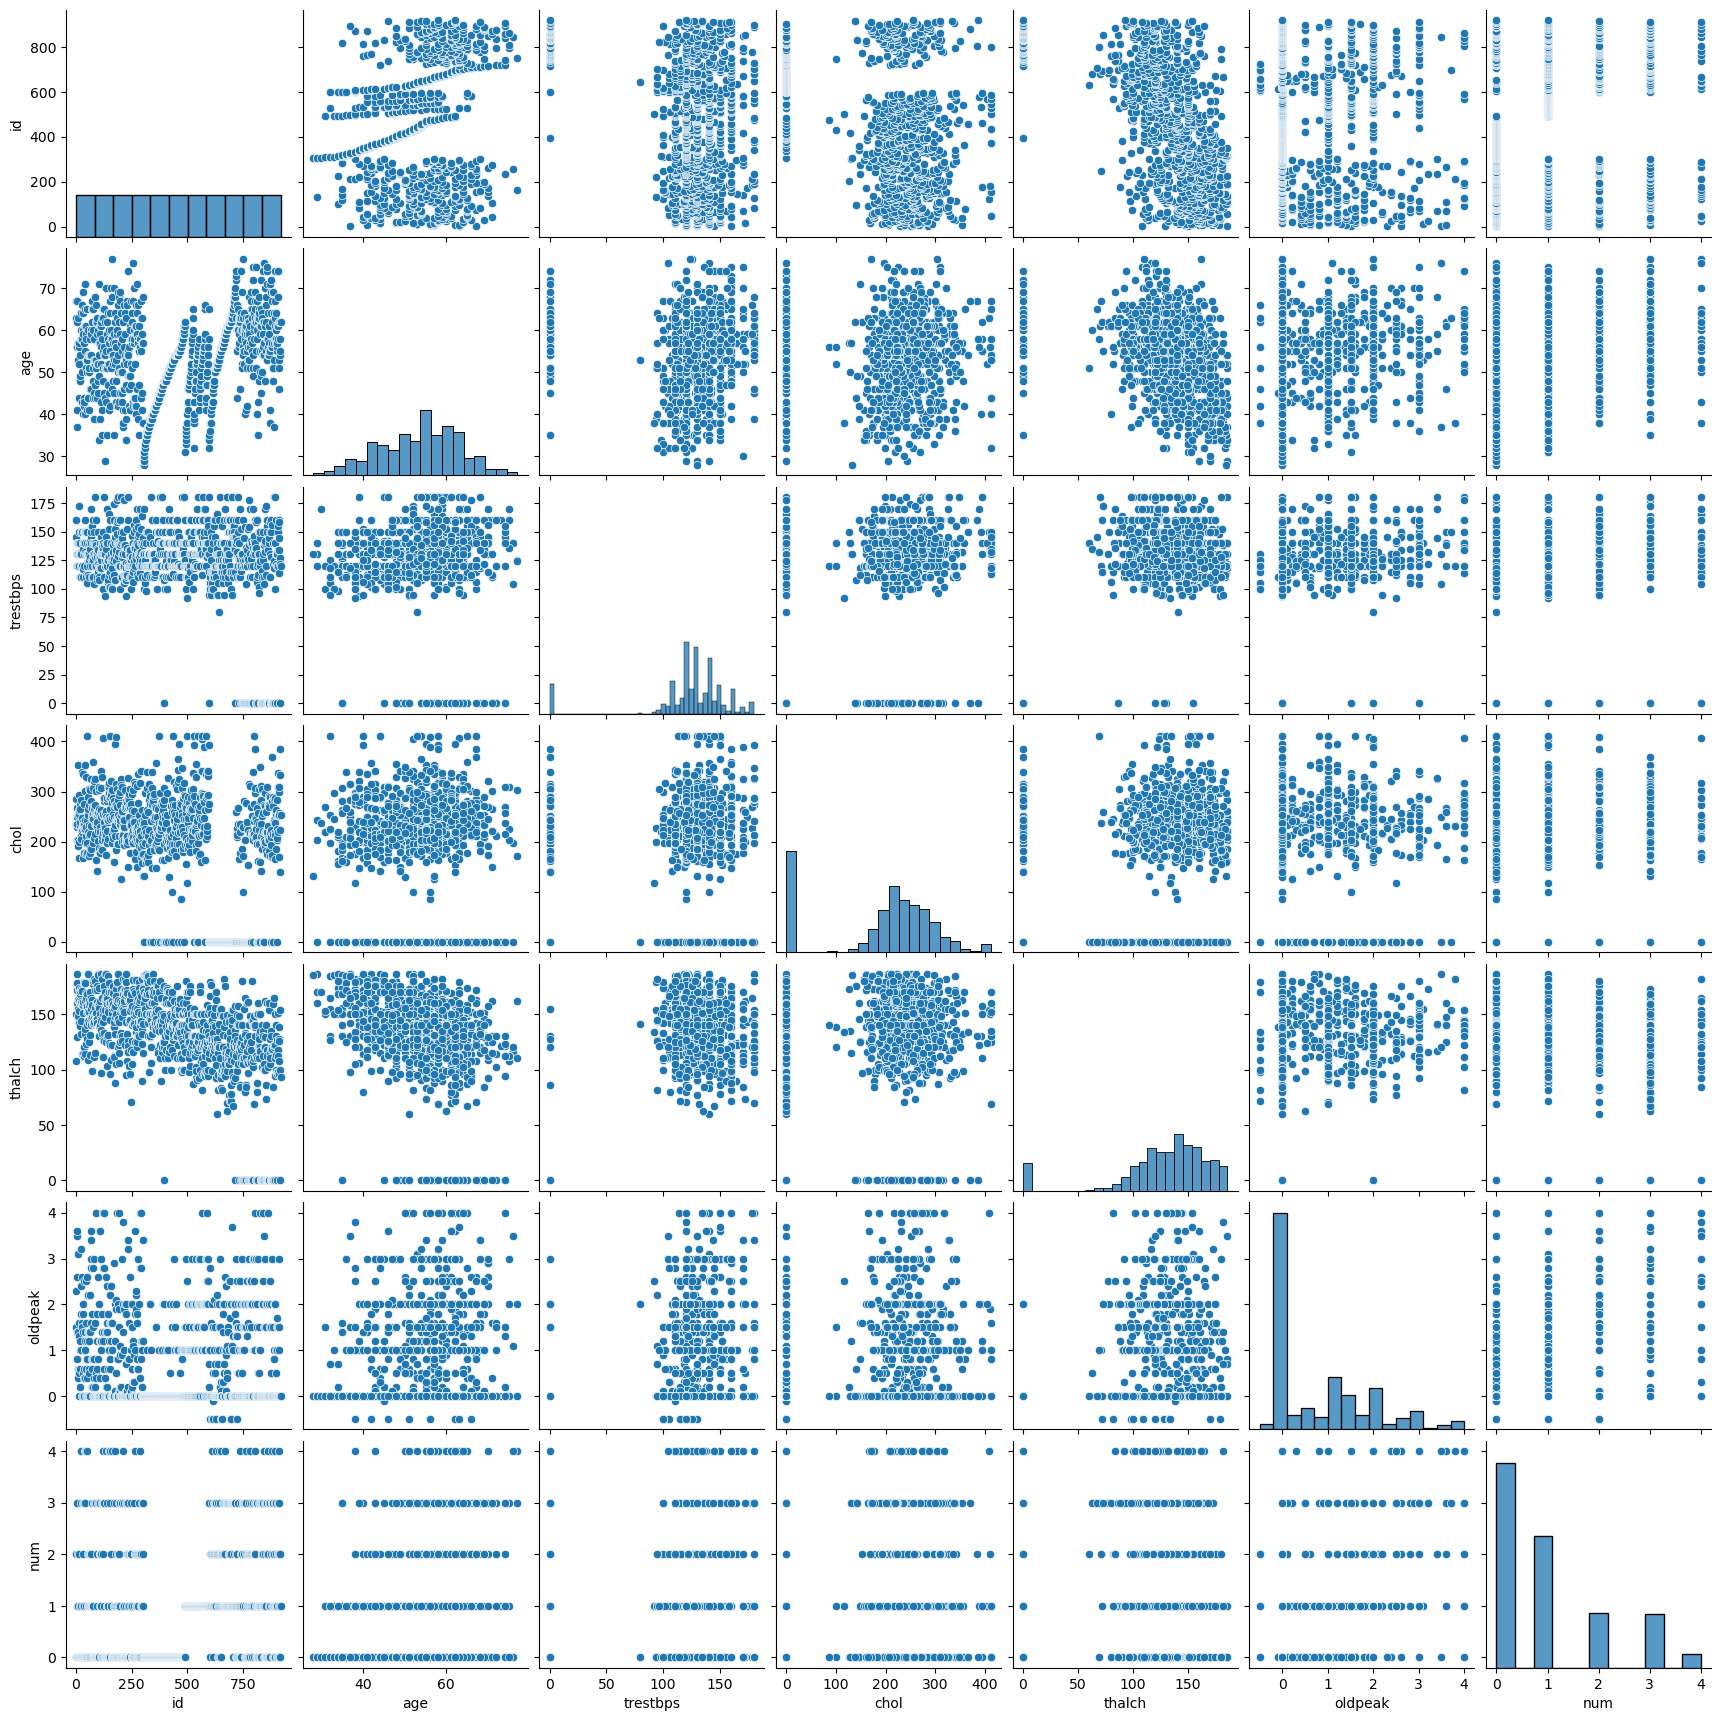

In [255]:
# pairplot
sns.pairplot(df[numerical_columns])
plt.show()

In [ ]:
# Decoding 'CardRskIQ' column
CardRskIQ = []

for value in df['num']:
    if value == 0:
        CardRskIQ.append('No Risk')
    else:
        CardRskIQ.append('At Risk')

df['CardRskIQ'] = CardRskIQ

In [258]:
# Encoding 'CardRskIQ' column
for value in df['CardRskIQ']:
    if value == 'No Risk':
        df['CardRskIQ'] = df['CardRskIQ'].replace('No Risk', 0)
    else:
        df['CardRskIQ'] = df['CardRskIQ'].replace('At Risk', 1)

C:\Users\User\AppData\Local\Temp\ipykernel_15080\1902504754.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CardRskIQ'] = df['CardRskIQ'].replace('At Risk', 1)


C:\Users\User\AppData\Local\Temp\ipykernel_15080\2341042375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CardRskIQ', palette='Set2')


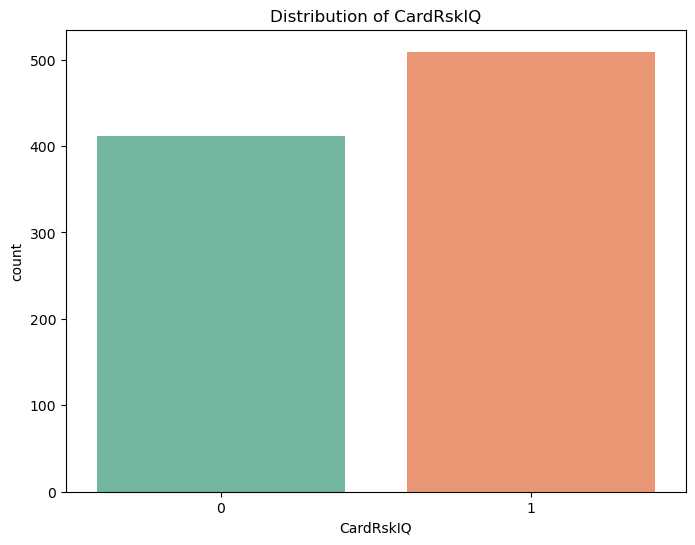

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CardRskIQ', palette='Set2')
plt.title('Distribution of CardRskIQ')
plt.show()

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
    print (f'Column: {column}, Unique values: {df[column].unique()}')

Column: sex, Unique values: ['Male' 'Female']
Column: dataset, Unique values: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Column: cp, Unique values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Column: fbs, Unique values: [True False]
Column: restecg, Unique values: ['lv hypertrophy' 'normal' 'st-t abnormality']
Column: exang, Unique values: [False True]
Column: slope, Unique values: ['downsloping' 'flat' 'upsloping']
Column: ca, Unique values: [0.0 3.0 2.0 1.0]
Column: thal, Unique values: ['fixed defect' 'normal' 'reversable defect']


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting features and target variable
y = df['CardRskIQ']
X = df.drop(['CardRskIQ', 'num', 'id'], axis=1)

In [276]:
X

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,186.0,False,3.5,downsloping,0.0,normal
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal
916,62,Male,VA Long Beach,typical angina,0.0,139.0,False,st-t abnormality,0.0,False,0.0,flat,0.0,normal
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect
918,58,Male,VA Long Beach,asymptomatic,0.0,385.0,True,lv hypertrophy,0.0,False,0.0,flat,0.0,normal


In [ ]:
# Encoding categorical variables and scaling numerical variables

ohe = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = ohe.fit_transform(X.select_dtypes(include=['object']))
X_final = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(X.select_dtypes(include=['object']).columns))
# X_final.head()
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X.select_dtypes(include=['float64', 'int64']))
X_scaled_df = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=['float64', 'int64']).columns)
X_final = pd.concat([X_scaled_df.reset_index(drop=True), X_final.reset_index(drop=True)], axis=1)
# X_final.head()

In [271]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

In [273]:
# Training a Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184

[[66 16]
 [10 92]]


In [278]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Building the Neural Network model
model = Sequential()
# Adding layers to the model
model.add(Dense(14, activation='relu'))
model.add(Dense(7, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid')) # Use 'softmax' for multi-class classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # categorial_crossentropy for multi-class classification
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5935 - loss: 0.6750 - val_accuracy: 0.6014 - val_loss: 0.6681
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6361 - loss: 0.6590 - val_accuracy: 0.6757 - val_loss: 0.6513
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6769 - loss: 0.6441 - val_accuracy: 0.7162 - val_loss: 0.6341
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7279 - loss: 0.6274 - val_accuracy: 0.7297 - val_loss: 0.6159
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7551 - loss: 0.6087 - val_accuracy: 0.7770 - val_loss: 0.5963
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7636 - loss: 0.5884 - val_accuracy: 0.7838 - val_loss: 0.5742
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7704 - loss: 0.5660 - val_accuracy: 0.7703 - val_loss: 0.5526
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7772 - loss: 0.5432 - val_accuracy: 0.7703 - 

In [279]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

accuracy = accuracy_score(y_test, (model.predict(X_test) > 0.5).astype("int32"))
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, (model.predict(X_test) > 0.5).astype("int32"))) 
print(confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32")))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8370 - loss: 0.3668
Test Accuracy: 0.84
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.84
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        82
           1       0.82      0.90      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[62 20]
 [10 92]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


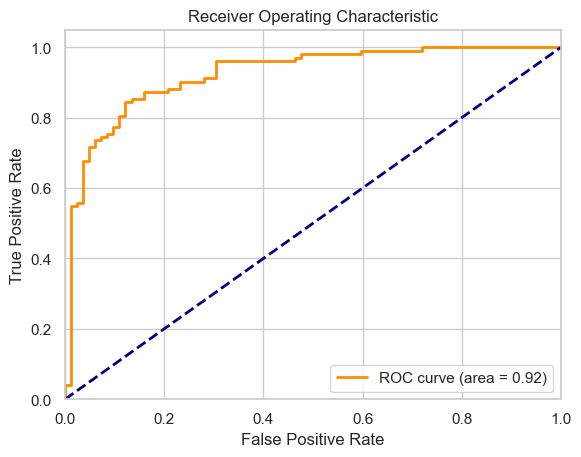

In [282]:
# ROC AUC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

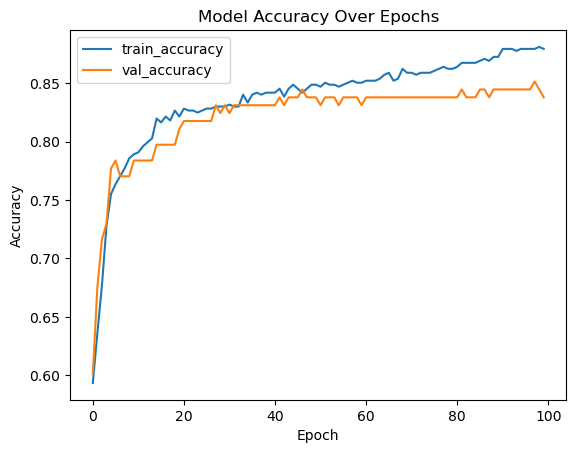

In [280]:
# Graphing the model training history
import matplotlib.pyplot as plt
history = model.history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

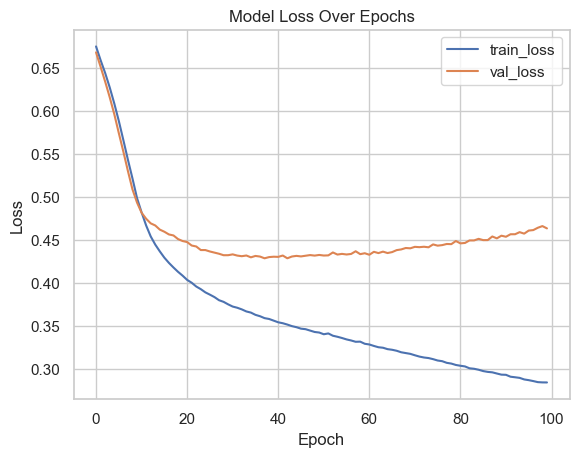

In [281]:
# training loss and validation loss
sns.set(style='whitegrid')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()